In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.cmap'] = 'Greys'

import numpy as np
np.set_printoptions(suppress=True)
np.set_printoptions(precision=2)


In [6]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [10]:
print (mnist.train.images.shape)
print (mnist.train.labels.shape)

(55000, 784)
(55000, 10)


In [12]:
print (mnist.test.images.shape)
print (mnist.test.labels.shape)

(10000, 784)
(10000, 10)


[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


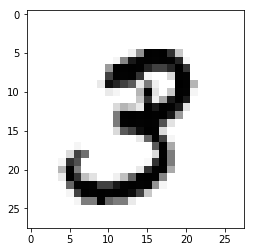

In [13]:
example_image = mnist.train.images[1]
example_image_reshaped = example_image.reshape((28, 28)) # Can't render a line of 784 numbers
example_label = mnist.train.labels[1]

print (example_label)
plt.imshow(example_image_reshaped)

# Setting up

In [15]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

In [1]:
# Define some helper functions to ease the definition of the model
def weight_variable(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1))

def bias_variable(shape):
    return tf.Variable(tf.constant(0.1, shape=shape))

def conv(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def pool(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# Input -> CONV (-> ReLU -> Pool) -> FC -> ReLU -> FC -> Softmax -> Loss

In [16]:
# A score function (model) involving some layers

# Reshape the input to look like a volume (Input)
x_image = tf.reshape(x, [-1, 28, 28, 1])

# A convolutional layer (CONV -> RELU -> POOL)
W_conv = weight_variable([5, 5, 1, 32])
b_conv = bias_variable([32])
h_conv = tf.nn.relu(conv(x_image, W_conv) + b_conv)
h_pool = pool(h_conv)

# A densely connected layer (FC)
W_fc1 = weight_variable([14*14*32, 1024])
b_fc1 = bias_variable([1024])
h_pool_flat = tf.reshape(h_pool, [-1, 14*14*32])
h_fc1 = tf.nn.relu(tf.matmul(h_pool_flat, W_fc1) + b_fc1)

# Another densely connected layer (for "readout") (FC)
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y = tf.matmul(h_fc1, W_fc2) + b_fc2

In [17]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))

In [18]:
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)


# Training the model

In [19]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [22]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [23]:
for i in range(20000):
    batch = mnist.train.next_batch(50)
    if i%1000 == 0:
        train_accuracy = accuracy.eval(session=sess, feed_dict={
            x:batch[0], y_: batch[1]})
        print("step %d, training accuracy %g"%(i, train_accuracy))
    train_step.run(session=sess, feed_dict={x: batch[0], y_: batch[1]})

step 0, training accuracy 0.92
step 1000, training accuracy 1
step 2000, training accuracy 1
step 3000, training accuracy 1
step 4000, training accuracy 1
step 5000, training accuracy 1
step 6000, training accuracy 1
step 7000, training accuracy 1
step 8000, training accuracy 1
step 9000, training accuracy 0.98
step 10000, training accuracy 1
step 11000, training accuracy 1
step 12000, training accuracy 1
step 13000, training accuracy 1
step 14000, training accuracy 1
step 15000, training accuracy 1
step 16000, training accuracy 1
step 17000, training accuracy 1
step 18000, training accuracy 1
step 19000, training accuracy 1


# Verifying

In [24]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9907
